# Comparing charcoal decontamination when using GTDB rs202 reps vs. GTDB rs207 reps databases for one set of GTDB genomes

To run charcoal without prohibitiviely long DAG solve times in snakemake, we split the GTDB database into many chunks, and ran each chunk separately. 
As we were experimenting with databases, we ran charcoal using a database containing only GTDB representative genomes for one set of genomes using both rs202 and rs207.
This notebook commpares the charcoal results when upgrading from rs202 to rs207.

In [1]:
setwd("..")

In [8]:
library(dplyr)
library(readr)
library(tidyr)
library(ggplot2)

In [29]:
# change default figure size
options(repr.plot.width=5, repr.plot.height=4, repr.plot.res = 300)
# disable scientific notation (for plot axes)
# options(scipen = 999)

## Read in metadata and charcoal results

### Obtain and read in rs207 metadata

In [9]:
destfile <- "inputs/gtdb-rs207/bac120_metadata_rs207.tar.gz"
url <- "https://data.gtdb.ecogenomic.org/releases/release207/207.0/bac120_metadata_r207.tar.gz"
if (!file.exists(destfile)) {
  download.file(url, destfile, method="auto") 
}
outfile <- "inputs/gtdb-rs207/bac120_metadata_r207.tsv"
if (!file.exists(outfile)){
  untar(destfile, exdir = "inputs/gtdb-rs207")
}

destfile <- "inputs/gtdb-rs207/ar53_metadata_rs207.tar.gz"
url <- "https://data.gtdb.ecogenomic.org/releases/release207/207.0/ar53_metadata_r207.tar.gz"
if (!file.exists(destfile)) {
  download.file(url, destfile, method="auto") 
}
outfile <- "inputs/gtdb-r207/ar53_metadata_r207.tsv"
if (!file.exists(outfile)){
  untar(destfile, exdir = "inputs/gtdb-rs207")
}

In [10]:
gtdb_metadata <- read_tsv("inputs/gtdb-rs207/bac120_metadata_r207.tsv", show_col_types = FALSE) %>%
  separate(gtdb_taxonomy, into = c("domain", "phylum", "class", "order", "family", "genus", "species"), 
           sep = ";") %>%
  mutate(ncbi_database = ifelse(grepl(pattern = "GB", accession), "GenBank", "none"),
         ncbi_database = ifelse(grepl(pattern = "RS", accession), "RefSeq", ncbi_database)) %>%
  mutate(accession = gsub("^RS_", "", accession),
         accession = gsub("^GB_", "", accession))

gtdb_metadata <- read_tsv("inputs/gtdb-rs207/ar53_metadata_r207.tsv", show_col_types = FALSE) %>%
  separate(gtdb_taxonomy, into = c("domain", "phylum", "class", "order", "family", "genus", "species"), 
           sep = ";") %>%
  mutate(ncbi_database = ifelse(grepl(pattern = "GB", accession), "GenBank", "none"),
         ncbi_database = ifelse(grepl(pattern = "RS", accession), "RefSeq", ncbi_database)) %>%
  mutate(accession = gsub("^RS_", "", accession),
         accession = gsub("^GB_", "", accession)) %>%
  bind_rows(gtdb_metadata)

Warning message:
“One or more parsing issues, see `problems()` for details”


### obtain and read in rs202 metadata

In [11]:
destfile <- "inputs/gtdb/bac120_metadata_r202.tar.gz"
url <- "https://data.ace.uq.edu.au/public/gtdb/data/releases/release202/202.0/bac120_metadata_r202.tar.gz"
if (!file.exists(destfile)) {
  download.file(url, destfile, method="auto") 
}
outfile <- "inputs/gtdb/bac120_metadata_r202.tsv"
if (!file.exists(outfile)){
  untar(destfile, exdir = "inputs/gtdb")
}

destfile <- "inputs/gtdb/ar122_metadata_r202.tar.gz"
url <- "https://data.ace.uq.edu.au/public/gtdb/data/releases/release202/202.0/ar122_metadata_r202.tar.gz"
if (!file.exists(destfile)) {
  download.file(url, destfile, method="auto") 
}
outfile <- "inputs/gtdb/ar122_metadata_r202.tsv"
if (!file.exists(outfile)){
  untar(destfile, exdir = "inputs/gtdb")
}

In [12]:
gtdb_metadata <- read_tsv("inputs/gtdb/bac120_metadata_r202.tsv", show_col_types = F) %>%
  separate(gtdb_taxonomy, into = c("domain", "phylum", "class", "order", "family", "genus", "species"), 
           sep = ";") %>%
  mutate(ncbi_database = ifelse(grepl(pattern = "GB", accession), "GenBank", "none"),
         ncbi_database = ifelse(grepl(pattern = "RS", accession), "RefSeq", ncbi_database)) %>%
  mutate(accession = gsub("GB_", "", accession)) %>%
  mutate(accession = gsub("RS_", "", accession))

gtdb_metadata <- read_tsv("inputs/gtdb/ar122_metadata_r202.tsv", show_col_types = F) %>%
  separate(gtdb_taxonomy, into = c("domain", "phylum", "class", "order", "family", "genus", "species"), 
           sep = ";") %>%
  mutate(ncbi_database = ifelse(grepl(pattern = "GB", accession), "GenBank", "none"),
         ncbi_database = ifelse(grepl(pattern = "RS", accession), "RefSeq", ncbi_database)) %>%
  mutate(accession = gsub("GB_", "", accession)) %>%
  mutate(accession = gsub("RS_", "", accession)) %>%
  bind_rows(gtdb_metadata)

Warning message:
“One or more parsing issues, see `problems()` for details”


### read in lineages?

In [ ]:
# lineages_rs207 <- read_csv("inputs/gtdb-rs207/gtdb-rs207.taxonomy.csv")
# lineages_rs202 

### read in charcoal results

In [19]:
stage1_rs202 <- read_csv("outputs/gtdb_rs202_charcoal1_reps/stage1_hitlist.csv", show_col_types = F)%>%
  mutate(genome = gsub("_genomic.fna.gz", "", genome)) %>%
  rename_with(~ paste0("rs202_", .x)) %>%
  rename(genome = rs202_genome)
stage1_rs207 <- read_csv("outputs/gtdb_rs207_charcoal1_reps/stage1_hitlist.csv", show_col_types = F)%>%
  mutate(genome = gsub("_genomic.fna.gz", "", genome)) %>%
  rename_with(~ paste0("rs207_", .x)) %>%
  rename(genome = rs207_genome)
stage1_combined <- left_join(stage1_rs202, stage1_rs207, by = "genome")

## What is the taxonomic composition of the set of genomes we're looking at?

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


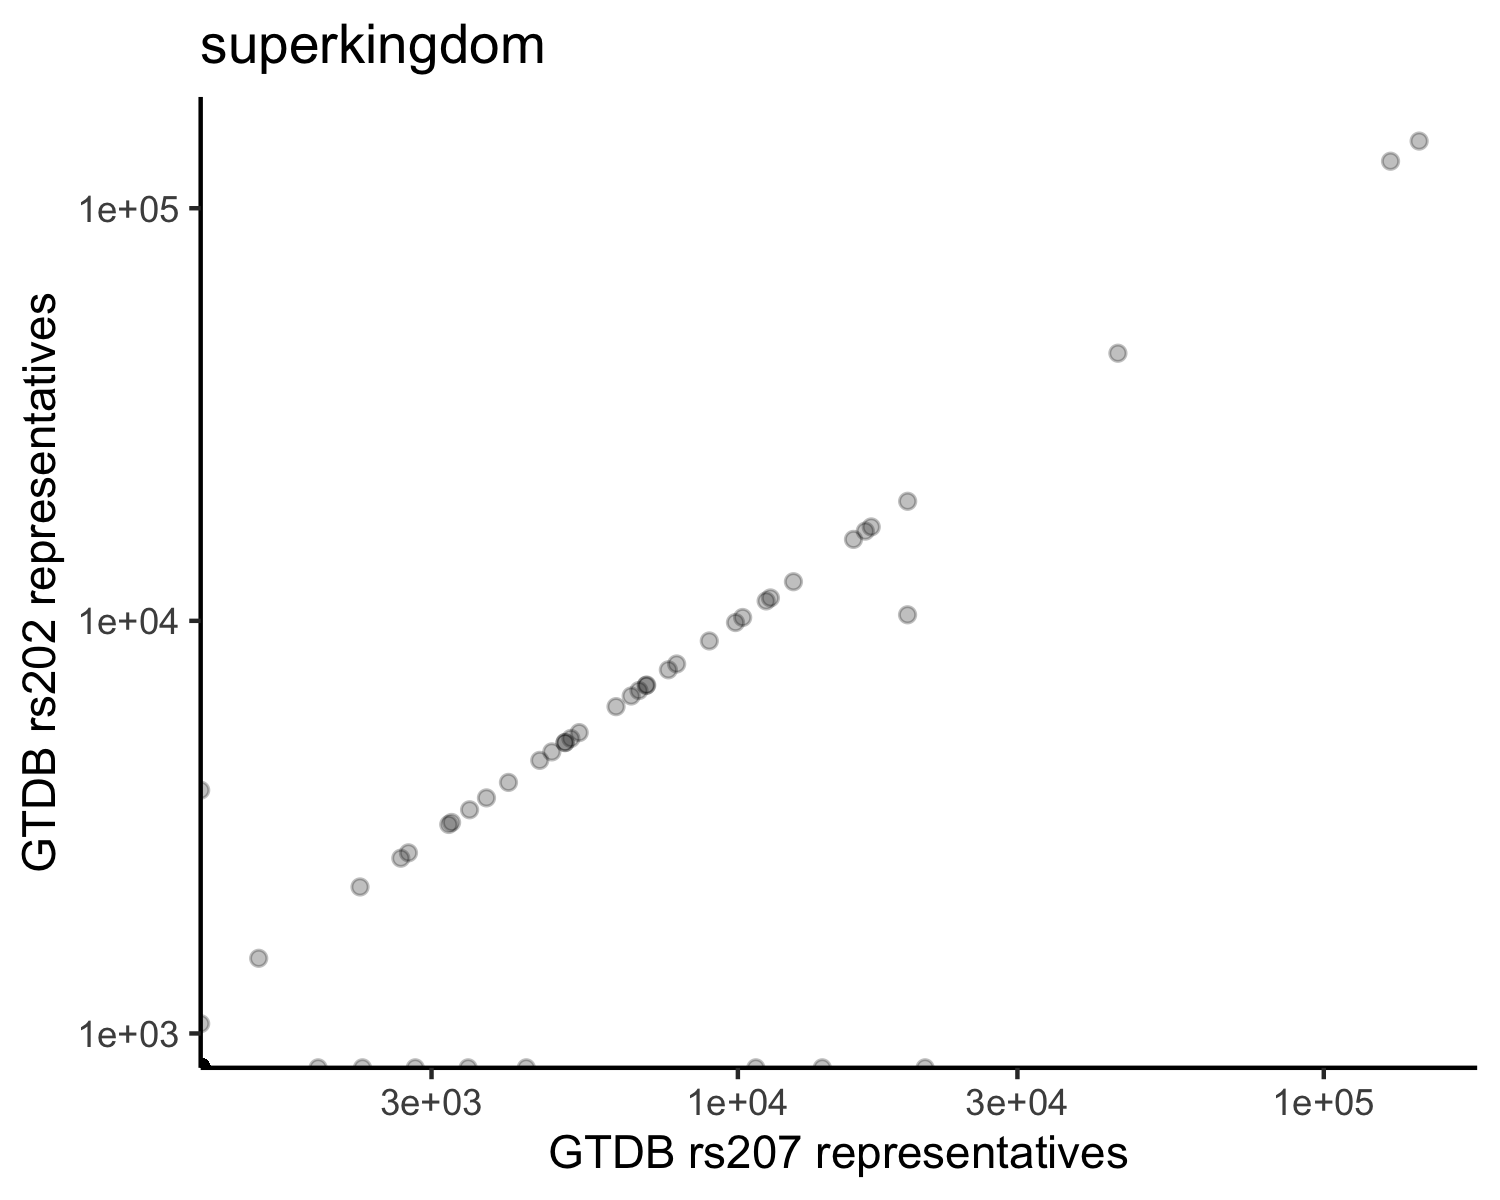

In [36]:
ggplot(stage1_combined, aes(x = rs207_superkingdom_bad_bp, y = rs202_superkingdom_bad_bp)) +
  geom_point(alpha = .25) +
  theme_classic() + 
  scale_x_log10() +
  scale_y_log10() +
  labs(x = "GTDB rs207 representatives", y = "GTDB rs202 representatives", title = "superkingdom")

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


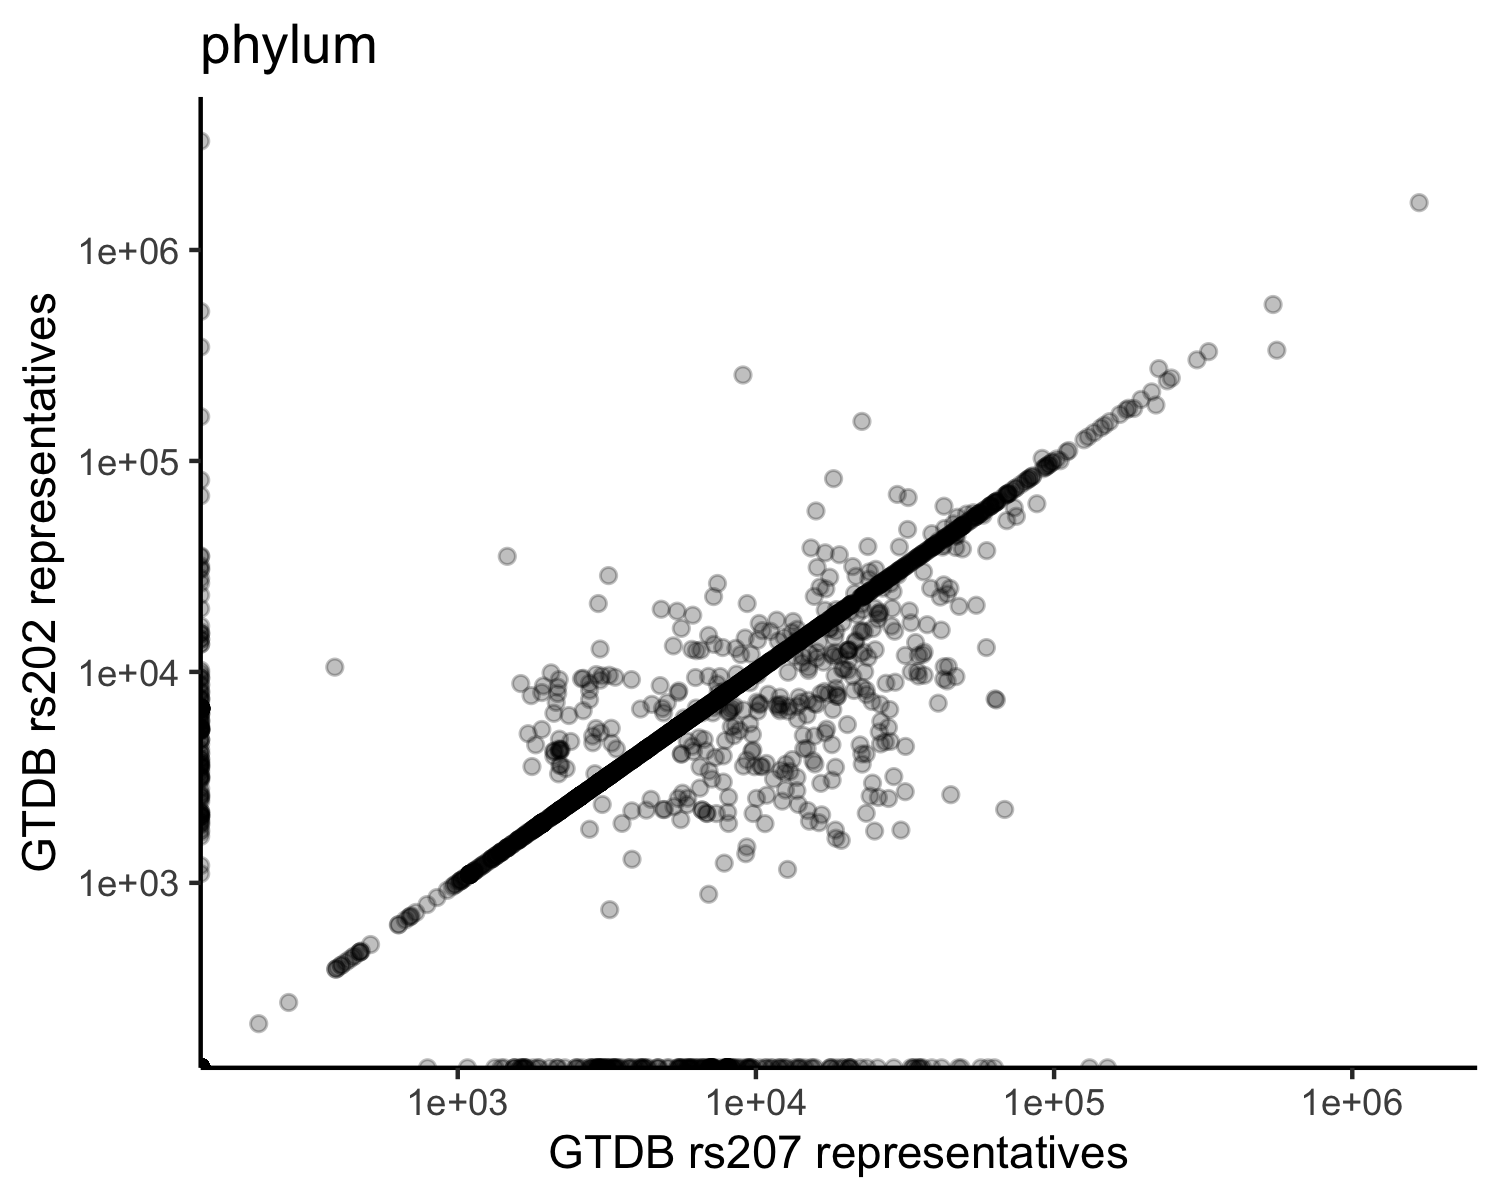

In [35]:
ggplot(stage1_combined, aes(x = rs207_phylum_bad_bp, y = rs202_phylum_bad_bp)) +
  geom_point(alpha = .25) +
  theme_classic() + 
  scale_x_log10() +
  scale_y_log10() +
  labs(x = "GTDB rs207 representatives", y = "GTDB rs202 representatives", title = "phylum")

In [43]:
cat(colnames(stage1_rs202), sep = ", ")

genome, rs202_filter_at, rs202_override_filter_at, rs202_total_bad_bp, rs202_superkingdom_bad_bp, rs202_phylum_bad_bp, rs202_class_bad_bp, rs202_order_bad_bp, rs202_family_bad_bp, rs202_genus_bad_bp, rs202_f_ident, rs202_f_major, rs202_lineage, rs202_comment

In [49]:
stage1_rs202_long <- stage1_rs202 %>%
  select(genome, rs202_superkingdom_bad_bp, rs202_phylum_bad_bp, rs202_class_bad_bp, 
         rs202_order_bad_bp, rs202_family_bad_bp, rs202_genus_bad_bp) %>%
  pivot_longer(-genome, names_to = "metric", values_to = "base_pairs") %>%
  separate(metric, into = c("database", "lineage_level", "tmp1", "tmp2"), sep = "_") %>%
  select(-tmp1, -tmp2)

stage1_rs207_long <- stage1_rs207 %>%
  select(genome, rs207_superkingdom_bad_bp, rs207_phylum_bad_bp, rs207_class_bad_bp, 
         rs207_order_bad_bp, rs207_family_bad_bp, rs207_genus_bad_bp) %>%
  pivot_longer(-genome, names_to = "metric", values_to = "base_pairs") %>%
  separate(metric, into = c("database", "lineage_level", "tmp1", "tmp2"), sep = "_") %>%
  select(-tmp1, -tmp2)

stage1_combined_long <- left_join(stage1_rs202_long, stage1_rs207_long, by = c("genome", "lineage_level")) %>%
  select(genome, lineage_level, base_pairs_rs202 = base_pairs.x, base_pairs_rs207 = base_pairs.y)

In [50]:
head(stage1_combined_long)

genome,lineage_level,base_pairs_rs202,base_pairs_rs207
<chr>,<chr>,<dbl>,<dbl>
GCA_012103455.1,superkingdom,0,0
GCA_012103455.1,phylum,0,0
GCA_012103455.1,class,0,0
GCA_012103455.1,order,5922262,5922262
GCA_012103455.1,family,5922262,5922262
GCA_012103455.1,genus,5922262,5922262


Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


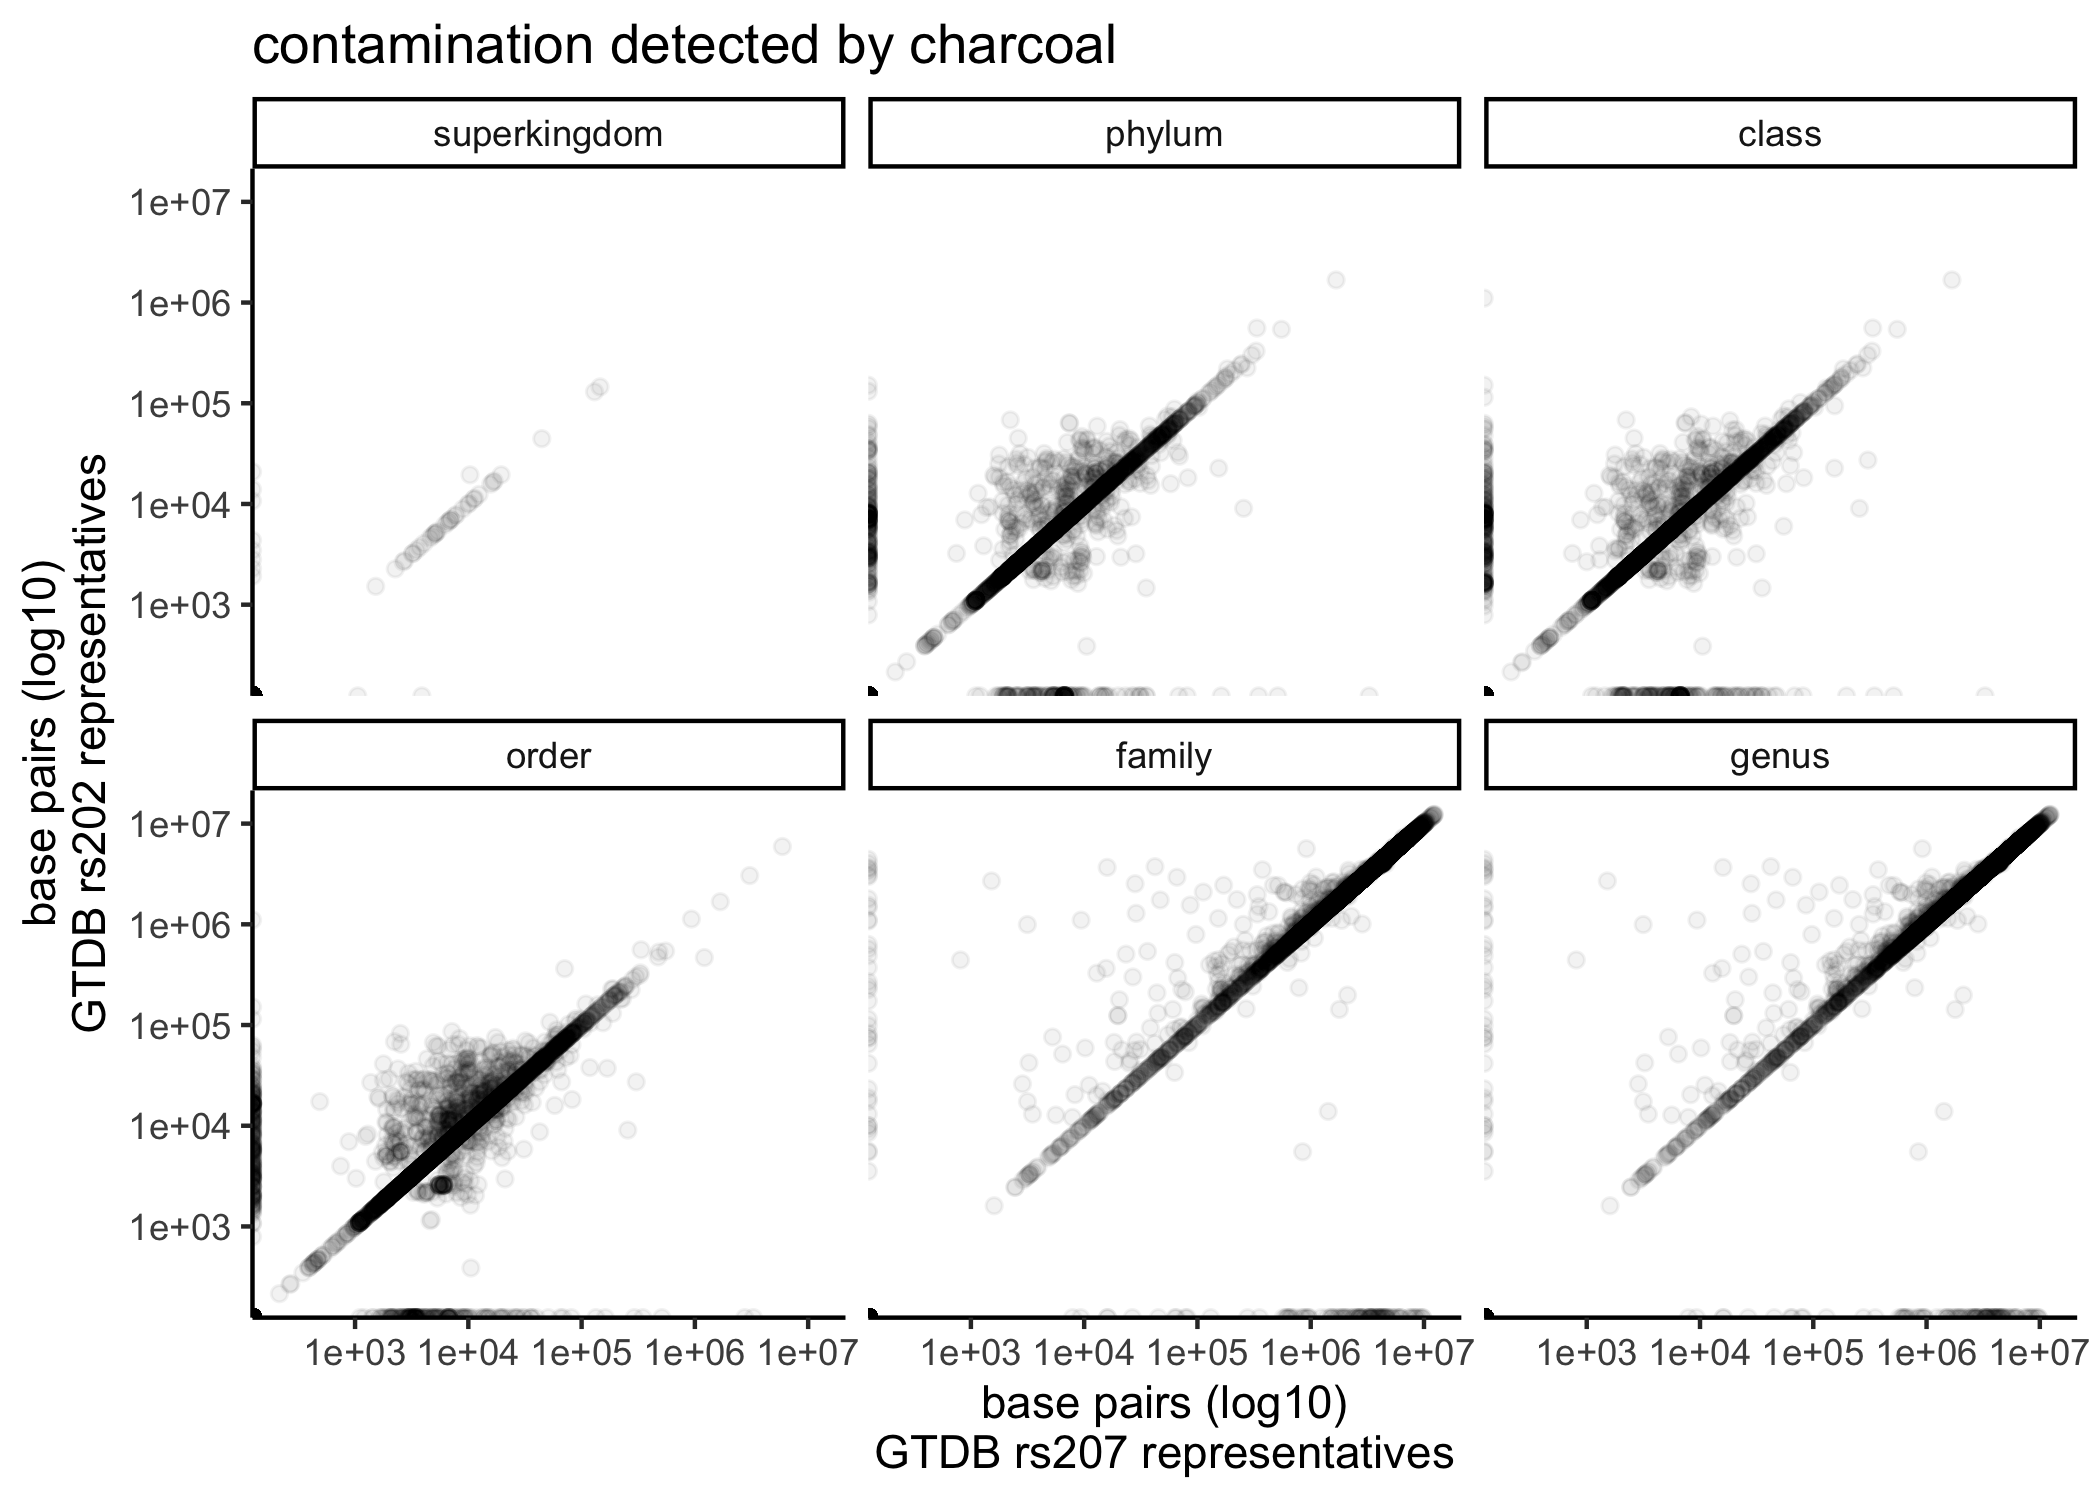

In [60]:
# change default figure size
options(repr.plot.width=7, repr.plot.height=5, repr.plot.res = 300)

stage1_combined_long$lineage_level <- factor(stage1_combined_long$lineage_level, 
                                            levels = c("superkingdom", "phylum", "class", "order", "family", "genus"))

ggplot(stage1_combined_long, 
       aes(x = base_pairs_rs202, y = base_pairs_rs207)) +
  geom_point(alpha = .05) +
  theme_classic() + 
  scale_x_log10() +
  scale_y_log10() +
  facet_wrap(~lineage_level) +
  labs(x = "base pairs (log10)\nGTDB rs207 representatives", y = "base pairs (log10)\nGTDB rs202 representatives", title = "contamination detected by charcoal")

In [56]:
table(stage1_combined_long$base_pairs_rs202 == stage1_combined_long$base_pairs_rs207)


FALSE  TRUE 
 9242 68284 

In [57]:
table(stage1_combined_long$base_pairs_rs202 > stage1_combined_long$base_pairs_rs207)


FALSE  TRUE 
73242  4284 

In [58]:
table(stage1_combined_long$base_pairs_rs202 < stage1_combined_long$base_pairs_rs207)


FALSE  TRUE 
72568  4958 